In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches

import datetime
import os
from pathlib import Path


In [4]:
start = datetime.datetime(2017, 3, 19, 0, 0, 0)
date = start
deltatime = 5 #every 5 minutes
#delta = datetime.timedelta(days = 1)
delta = datetime.timedelta(minutes = deltatime)
path = "/media/shawn-pc/HD-PNFU3/Camera2/"
lists=[]  #圖片路徑存在lists
for i in range(60//deltatime*24*365):
    #print(path+date.strftime("%Y/%m/%d/%H/%H-%M-%S.jpg"))
    file = path+date.strftime("%Y/%m/%d/%H/%H-%M-%S.jpg")
    lists.append(file)
    date = date + delta
print(len(lists))
print(lists[3])


105120
/media/shawn-pc/HD-PNFU3/Camera2/2017/03/19/00/00-15-00.jpg


In [5]:
w = 3
h = 3
x = 300
y = 350
columns= 365
rows = 60//deltatime *24
print(rows)
montage_w = w * columns
montage_h = h * rows
print(montage_w,montage_h)

montage = np.zeros([montage_h,montage_w,3],dtype=np.uint8)
montage.fill(255) # or img[:] = 255)

288
1095 864


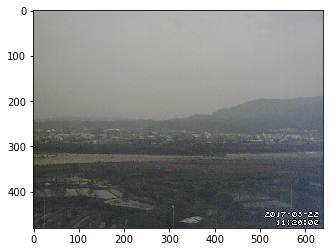

In [6]:
#繪製範例圖片加上紅框
img = Image.open(lists[1000])

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.savefig('sample.png')
plt.show()

In [ ]:
#用PIL檢測圖片檔，如圖片錯誤則...

def is_jpg(filename):
    try:
        i=Image.open(filename)
        return i.format =='JPEG'
    except IOError:
        return False
   

#for file in lists:
#    if is_jpg(file) == False:
#        print(file)
        #os.remove(localPath+file)

#print("done")

In [ ]:
i = 0
for file in lists:
    m = i %(60//deltatime*24)  #餘數 橫的
    n = i //(60//deltatime*24) #商數 直的  


    if is_jpg(file):
        img=np.array(Image.open(file))  #打开图像并转化为数字矩阵
        montage[m*h:(m+1)*h,n*w:(n+1)*w]=img[y:y+h,x:x+w]
    print((i)/(len(lists))*100)
    i=i+1
print("montage done")

In [7]:
#繪製座標軸刻度

xticks_old=[]
xticks_new=[]
date = start
deltaDay = datetime.timedelta(days = 1)
for i in range(365):
    #print(date.strftime("%d"))
    if date.strftime("%d") == "01":
        #print(str(i))
        xticks_old.append(i)
        #print(date.strftime("%Y\n%m"))
        xticks_new.append(date.strftime("%Y\n%m"))
    date = date + deltaDay
print(xticks_old)
print(xticks_new)
xticks_old = xticks_old * np.array([w])


[13, 43, 74, 104, 135, 166, 196, 227, 257, 288, 319, 347]
['2017\n04', '2017\n05', '2017\n06', '2017\n07', '2017\n08', '2017\n09', '2017\n10', '2017\n11', '2017\n12', '2018\n01', '2018\n02', '2018\n03']


In [ ]:
yticks_old=[]
yticks_new=[]
date = start

for i in range(60//deltatime*24):
    if date.strftime("%M") == "00":
        #print(str(i))
        yticks_old.append(i)
        #print(date.strftime("%H"))
        yticks_new.append(date.strftime("%H"))
    date = date + delta


yticks_old = yticks_old * np.array([h])
print(yticks_old)
print(yticks_new)


In [ ]:
#plt.figure(figsize=(20, 20*montage_h/montage_w))
plt.figure(figsize=(20, 15), dpi=200, facecolor='k', edgecolor='k')

plt.imshow(montage)
plt.axis('on')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Time(hour)', fontsize=30)


plt.xticks(xticks_old,xticks_new, fontsize=20)
plt.yticks(yticks_old,yticks_new, fontsize=20)

plt.savefig('montage.png')
#plt.show()
print("fig done")
